In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_excel('/Users/patrickslearningprogams/Desktop/Python Projects/Airlines Ticket Fare/Data_Train.xlsx')

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# Deal with missing values

In [6]:
train_data.shape # Gives you the shape of your table, 10683rows and 11columns

(10683, 11)

In [7]:
# cleaning the data

In [8]:
# Checking for missing values in the dataset
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# removing missing values
train_data.dropna(inplace=True)

In [10]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
# check different data types
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [12]:
# create function to give appropiate datetime type 
def chante_to_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col]) 

In [13]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# apply function 
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    chante_to_datetime(i)

In [15]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [16]:
#splitting date of journey into days and months
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-11 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-03-11 05:50:00,2021-03-11 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-03-11 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-03-11 18:05:00,2021-03-11 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-03-11 16:50:00,2021-03-11 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [18]:
#dropping Date_of_Journey from the table
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [19]:
#create functions to extract hours and minutes from Dep_time and Arrival_time and drop them from the table
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour

def extract_minute(df,col):
    df[col+'_minute']=df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [20]:
#apply the functions to Dep_Time
extract_hour(train_data, 'Dep_Time')
extract_minute(train_data, 'Dep_Time')
drop_column(train_data, 'Dep_Time')

In [21]:
#apply the functions to Arrival_Time
extract_hour(train_data, 'Arrival_Time')
extract_minute(train_data, 'Arrival_Time')
drop_column(train_data, 'Arrival_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
#creating a standard of 0h 00m by assigning '0h' or '0m' to missing hours or minutes
#using the split function to access data separately
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   
            duration[i]=duration[i] + ' 0m'   
        else:
            duration[i]='0h '+ duration[i]

In [24]:
train_data['Duration'] =duration

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
#functions to access the hours and minutes of the 'Duration' data
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [27]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
drop_column(train_data, 'Duration')

In [30]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [31]:
#changing duration hours and minutes datatype from object to int
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [32]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int64
Duration_mins           int64
dtype: object

In [33]:
#differentiating categorical columns from numerical columns
#assigning all columns of type object to cat_col
cat_col = [col for col in train_data.columns if train_data[col].dtypes=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [34]:
cont_col = [col for col in train_data.columns if train_data[col].dtypes!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [35]:
# in this next section we will handle Categorical data
# and perform feature encoding data on data
## two kinds of categorical data: Nominal data [normal data i.e name of countries (doesnt have any hierachy)] - 
#perform Onehot encoding
#ordinal data [ data with some kind of order i.e good, better, best]
#perform labelEncoding

In [36]:
categorical = train_data[cat_col]

In [37]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [38]:
#get a count of every feature of the airline column
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

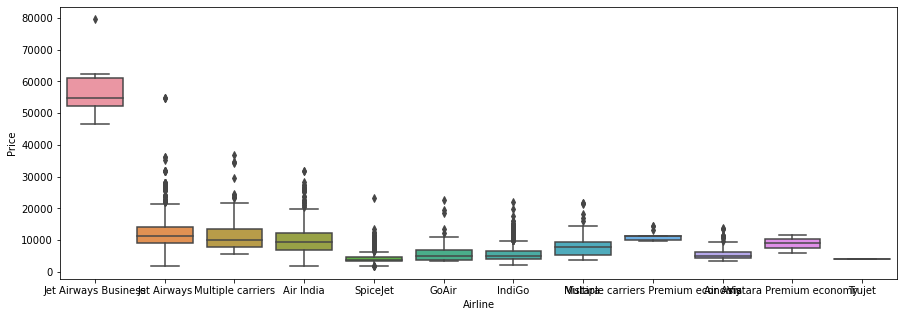

In [39]:
#find the relation about the airline with the price using a plot
#sort the values in descending order according to the price
plt.figure(figsize=(15,5)) #setting the display windows 
sns.boxplot(x='Airline', y='Price', data=train_data.sort_values('Price',ascending=False))

In [40]:
#using onehot encoding for the machine learning to understand the data
#machine learning doesnt understang string only numerical data
Airline = pd.get_dummies(categorical['Airline'], drop_first=True) #drop_first to avoid duplicates

In [41]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

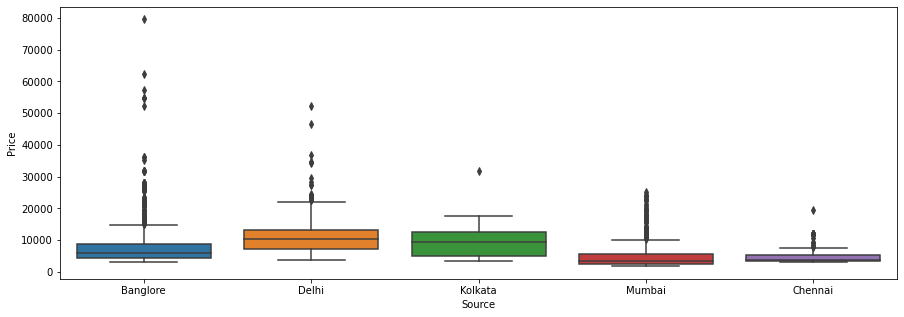

In [43]:
plt.figure(figsize=(15,5)) 
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price',ascending=False))

In [44]:
Source = pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

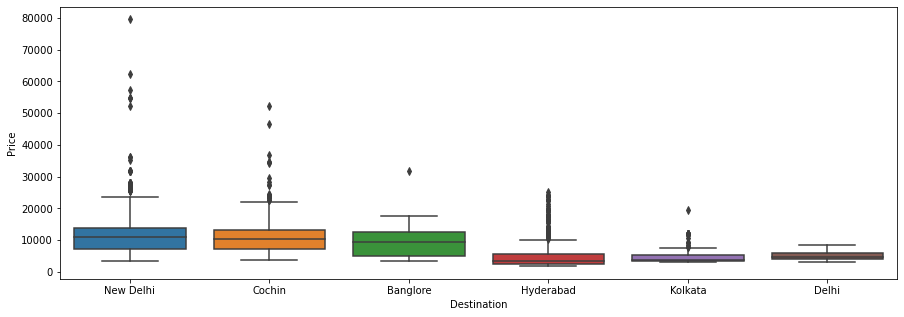

In [46]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination', y='Price', data=train_data.sort_values('Price',ascending=False))

In [47]:
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
#access the 'Route' column
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [49]:
#remove the arrows as machine learning will not comprehend them
categorical['Route'].str.split('→')

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [50]:
#access first element of the lists
categorical['Route'].str.split('→').str[0]

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route, Length: 10682, dtype: object

In [51]:
import warnings
from warnings import filterwarnings
filterwarnings ('ignore')

In [52]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

In [53]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [54]:
drop_column(categorical, 'Route')

In [55]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [56]:
#check for missing values
#Route_3,4,5 contain missing values
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [57]:
#replace missing values with None using fillna method
#inplace=True to update dataframe
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None', inplace=True)

In [58]:
#no missing values anymore
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [59]:
for i in categorical.columns:
    print(f'{i} has total {len(categorical[i].value_counts())} categories')

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [60]:
#because of the high number of categories in Route_2,3,4 using onehot encoding will create a whole lot more number
#of columns.and the data will become huge. So we need to be using labelEncoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
encoder = LabelEncoder()

In [63]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [64]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [65]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [66]:
#drop Additional_info column since there is no info provided
drop_column(categorical, 'Additional_Info')

In [67]:
#to see every unique item on the 'Total_Stops' column
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
#create a dictionnary to assign stops to number
dict = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [69]:
#map dict to Total_Stops and update column
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [70]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [71]:
#now we need to concatenate all the dataframes we've created (categorical + continuous)
#concatenate in a vertical fashion(axis=1)
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)

In [72]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [73]:
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')

In [74]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [75]:
#to display all the columns
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [76]:
#in this section we'll have to deal with Outlier detection & outlier imputation if available in data...
#separate independent and dependent features

In [77]:
#check for outliers
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

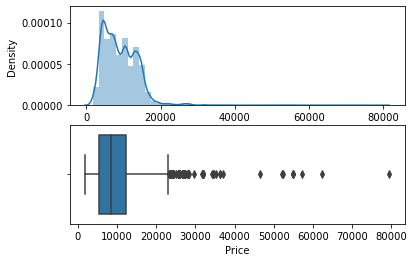

In [78]:
plot(data_train, 'Price')

In [79]:
#replace outliers with median using the 'where' numpy function
data_train['Price']=np.where(data_train['Price']>=40000, data_train['Price'].median(),data_train['Price'])

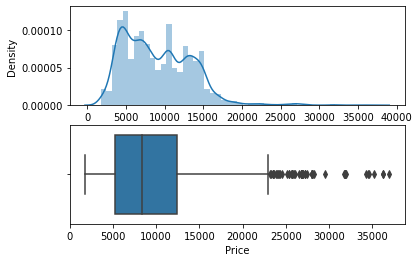

In [80]:
plot(data_train, 'Price')

In [81]:
#now we separate independent and dependent features

In [82]:
#indepencies stay on x variable
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [83]:
X.shape

(10682, 34)

In [84]:
#depencies on y variable
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [85]:
#for this section we will apply feature seclection on data...
#find the best features which will contribute most and that have a good relationship with the target variable
#Select important features to avoid issues of multiple dimensions and multiple columns

In [86]:
from sklearn.feature_selection import mutual_info_classif

In [87]:
#this will return some kind of priority, or importance with respect to the target variable
mutual_info_classif(X,y)

array([2.14042775, 2.01009681, 2.82783103, 2.29801653, 1.47042035,
       0.68856276, 0.75613213, 0.09606386, 0.6770895 , 0.90714433,
       0.00305658, 0.56916562, 0.00605294, 0.31494933, 0.        ,
       0.22651447, 0.01092568, 0.16158929, 1.53651999, 0.88505005,
       0.30052424, 1.5442354 , 0.41868123, 0.29158328, 0.16279016,
       0.37356045, 1.09698381, 0.85858848, 1.42884175, 1.20332063,
       1.85594904, 1.52834219, 1.77158555, 1.06586197])

In [88]:
#these numbers represent the importance with respect to the target variable

In [89]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.185548
Route_1,2.010874
Route_2,2.752543
Route_3,2.339646
Route_4,1.511860
Route_5,0.747055
Air India,0.777524
GoAir,0.086267
IndiGo,0.675871
Jet Airways,0.927195


In [90]:
#dataframe sorted on a basis of importance
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.752543
Route_3,2.339646
Total_Stops,2.185548
Route_1,2.010874
Arrival_Time_hour,1.829344
Duration_hours,1.785375
Arrival_Time_minute,1.540630
Cochin,1.528811
Delhi,1.525373
Route_4,1.511860


In [91]:
#in this section we will apply machine learning algorithm to our data and automate predictions 

In [92]:
#use train_test_split to split our data into training data and testing data
from sklearn.model_selection import train_test_split

In [93]:
#0.2 means that 20% of our data will be used as testing data the rest is training data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [150]:
#define a function to predict the data using whatever machine learning model that will be passed onto it
from sklearn import metrics #use it to check metrics
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print(f'Training Score: {model.score(X_train,y_train)}')
    predictions=model.predict(X_test)
    print(f'Predictions are: {predictions}')
    print('\n')
    r2_score=metrics.r2_score(y_test,predictions)
    print(f'r2 score is: {r2_score}') #Prediction Accuracy
    
    print('MEA:',metrics.mean_absolute_error(y_test,predictions))
    print('MSA: ',metrics.mean_squared_error(y_test,predictions))
    print('RMSA: ',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)
    
    if dump==1:
        file=open('/Users/patrickslearningprogams/Desktop/Python Projects/Airlines Ticket Fare/model.pkl','wb')
        pickle.dump(model,file)
    

In [95]:
from sklearn.ensemble import RandomForestRegressor

Training Score: 0.9538147768498436
Predictions are: [ 2932.85       13354.675      12293.94033333 ...  3625.58
  5294.76       11135.38      ]


r2 score is: 0.8413825253244394
MEA: 1110.137875675305
MSA:  2996697.404316219
RMSA:  33.31873160363859


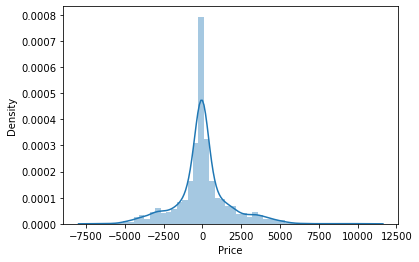

In [151]:
predict(RandomForestRegressor(),1)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training Score: 0.6102213511031335
Predictions are: [ 3371.60264176 11154.04978018 12038.10293558 ...  5202.57683696
  6949.84784593 10553.93865388]


r2 score is: 0.6374844008761719
MEA: 1904.9461718855964
MSA:  6848864.270097325
RMSA:  43.64568904125122


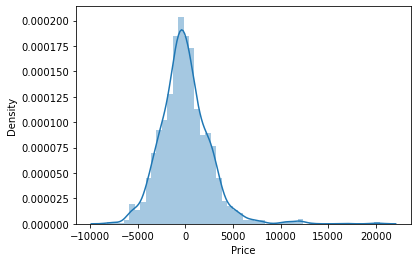

In [98]:
#Linear Regression
predict(LinearRegression(),0)

Training Score: 0.9685100635502201
Predictions are: [ 2754. 13033. 14151. ...  3540.  5192. 10697.]


r2 score is: 0.7608211724957166
MEA: 1250.5585478084543
MSA:  4518711.2770237345
RMSA:  35.36323723598356


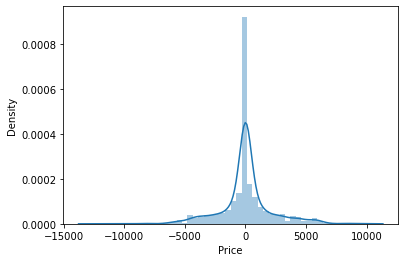

In [99]:
#Decision Tree Regressor
predict(DecisionTreeRegressor(),0)

Training Score: 0.7677027459797942
Predictions are: [ 2754.  13579.  11251.4 ...  3602.   5942.   8616. ]


r2 score is: 0.6856653077535626
MEA: 1681.6349087505848
MSA:  5938601.394759008
RMSA:  41.0077420586721


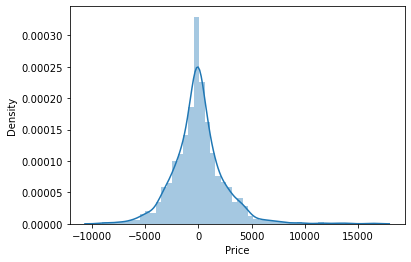

In [100]:
#KNN
predict(KNeighborsRegressor(),0)

In [104]:
#Hypertune models using cross validation

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
reg_rf=RandomForestRegressor()

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

In [111]:
random_grid={
    'n_estimators': n_estimators, #number of decision trees
    'max_features': ['auto', 'sqrt'],#number of features to consider at every split of decision tree
    'max_depth': max_depth, #maximum number of levels in our decision tree
    'min_samples_split': [5,10,15,100]#minimum number of splits required to split a node
}
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [114]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [116]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [119]:
#best parameters selected by the cross validation
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

<AxesSubplot:xlabel='Price', ylabel='Density'>

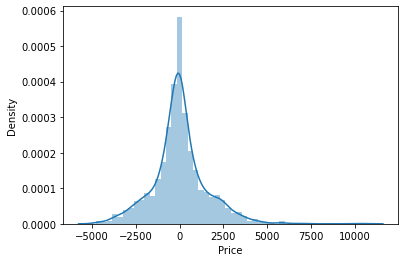

In [120]:
#predict on test data
prediction=rf_random.predict(X_test)
#distribution between actual data and prediction
sns.distplot(y_test-prediction)

In [121]:
#chech the prediction accuracy
metrics.r2_score(y_test,prediction)

0.8755079508939131

In [130]:
file=open('/Users/patrickslearningprogams/Desktop/Python Projects/Airlines Ticket Fare/rf_random.pkl','wb')

In [131]:
pickle.dump(rf_random,file)

In [155]:
model=open('/Users/patrickslearningprogams/Desktop/Python Projects/Airlines Ticket Fare/model.pkl','rb')
forrest=pickle.load(model)
predictions2=forrest.predict(X_test)
predictions2

array([ 2932.85      , 13354.675     , 12293.94033333, ...,
        3625.58      ,  5294.76      , 11135.38      ])

In [156]:
metrics.r2_score(y_test,predictions2)

0.8413825253244394